In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [104]:
%matplotlib inline

## Task1

Визначте області допустимих значень параметра γ та w, що роблять сім’ю функцій  u(w) добре визначеною сім’єю функцій корисності від багатства економічного агента, тобто  .  Зобразіть графічно кілька функцій корисності для різних значень γ і  для 0<w<10, якщо  $$u(w)=w^γ/γ.$$

ОДЗ: <br />
$w$ - багатство
$w$ > 0 <br/>
$y$ - параметр, $y$ != 0 $abs(y)$ < 1 (тому що опукла вгору)

In [105]:
w = np.linspace(0, 10, 100)

In [106]:
def utility(w, y):
    return (w ** y) / y

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


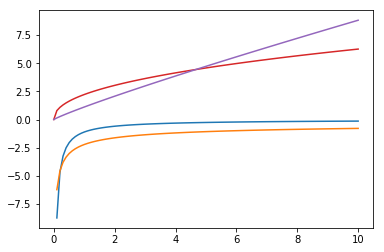

In [107]:
y = np.linspace(-0.9, 0.9, 5)

for y_i in y:
    plt.plot(w, utility(w, y_i), '-')


## Task2

Розв’яжемо задачу вибору оптимальної в’язки споживчих товарів за умов обмеженого бюджету споживача.  Нехай ціни на товари 1 та 2 відповідно дорівнюють p_1=20  та p_2=30, а доступний рівень багатства  споживача w=500. Припустимо, що функція задоволення від споживання товарів 1 та 2 в кількостях x_1 та x_2 визначається формулою $$u(x_1,x_2 )=x_1^{1/3}× x_2^{2/3}$$ . Знайдіть оптимальну кількість товарів  x_1 та x_2 (допускаються дробові значення споживання товарів), що максимізують задоволення даного споживача.

Обмеження на простір альтернатив - <br />
$$ 20 * x_1 + 30 * x_2  <= 500$$

Оскільки ми хочемо максимізувати ютіліті то можемо зробити рівність із цього, та вивести $n_1$ через $n_2$

$x_1 = (500 - 300 * x_2) / 20 $

Підставивши у функцію ютіліті та вирахувавши похідну, визначили що $x_2 = 11.1$ , $x_1 = 8.3$

## Task3

Розглянемо економічного агента з добре визначеною функцією корисності та рівнем багатства W.  Припустимо, що виплати по проекту характеризуються  наступною лотереєю  .  Припустимо, що W=20, G=44, B=7, p=0.4 і u(W)=∛W.  Зобразимо схематично дану лотерею L
 
Знайдіть максимальну ціну, за яку б інвестор погодився придбати цей проект.
Знайдіть мінімальну ціну, за яку б інвестор погодився продати цей проект, якщо ним він вже володіє, маючи ще й багатство W.


1.

 Ціна повинна задовільняти  $u(W + P_s) = p * u(W + G) + (1 - p) * u(W + B)$

У такому випадку, $(20 + P_s) ^ {1/3} = 0.4 * (20 + 44) ^ {1/3} + 0.6 * (20 + 7) ^ {1/3}$

(20 + P_s) = (3.82 + 1.7) ^ 3 => P_s = 148

2.

 Ціна повинна задовільняти  $u(W) = p * u(W - P_b + G) + (1 - p) * u(W - P_b + B)$

$ 2.68 = 0.4 * (64 - P_B) ^ {1/3} + 0.6 * (27 - P_b)^ {1/3}$

In [108]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(0.4 * (64 - x) ** (1/3) + 0.6 * (27 - x) ** (1/3) - 2.68, x)

[18.0224085780200]

## Task4

Відомо, що споживачі реагують на зміну ринкових цін зміною обсягів своїх покупок. Відділ продаж компанії оцінив вплив ціни на обсяги продаж у вигляді таблиці:<br />
Ціна, тис. грн	1,65	1,7	1,8	1,9	2	2,1	2,2	2,4 <br />
Обсяг продаж, шт.	430	397	361	336	313	292	273	256

Потрібно побудувати криву попиту, що задається функцією вигляду
$Q=exp⁡(a-b×p-c×p^2 )+d$
де Q – обсяги продаж, p – ціна, а a, b, c – параметри, і найкраще наближає заданий масив значень. Нехай (x_i,y_i) , i=1,…,n – заданий масив точок, f(x;a,b,c) – заданий клас функцій, тоді параметри a ̂,b ̂,c ̂,d ̂ визначають оптимальне наближення заданого масиву точок, якщо вони є розв’язком проблеми
∑_(i=1)^n▒〖〖(f(x_i;a,b,c,d)-y_i)〗^2→min〗.   


In [109]:
def func(x, a, b, c, d):
    return np.exp(a - b * x - c * x * x) + d

In [110]:
from scipy.optimize import curve_fit

In [111]:
P = np.array([1.65, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.4 ])

In [112]:
D = np.array([430, 397, 361, 336, 313, 292, 273, 256])

In [113]:
popt, pcov = curve_fit(func, P, D)

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [114]:
popt

array([ 10.54575731,   4.03962718,  -0.58597788, 187.01851784])

In [115]:
a, b, c, d = popt

In [116]:
print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')
print(f'd: {d}')

a: 10.545757305905488
b: 4.039627180926877
c: -0.5859778752143252
d: 187.0185178372358


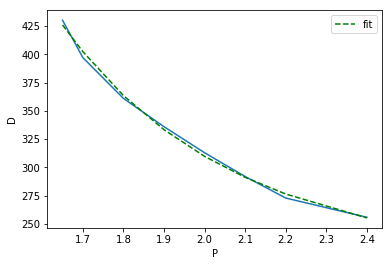

In [117]:
plt.plot(P, D)
plt.plot(P, func(P, *popt), 'g--', label='fit')
plt.xlabel('P')
plt.ylabel('D')
plt.legend()
plt.show()

## Task5

Для прийняття ефективних економічних рішень важливо вміти  моделювати функцію загальних витрат компанії на виробництво продукції. Припустимо, що середні витрати компанії на виробництво 1 од. продукції в залежності від обсягів виробництва, а також загальні витрати виражено  з допомогою наступної таблиці: 

Обсяги виробництва, <br />
Q	100	200	300	400	500	600	700	800 <br />
Середні витрати, AC	2,9	2,8	2,6	2,2	1,9	1,6	1,35	1,3 <br />
Загальні витрати, TC	290	560	780	880	950	960	945	1040 <br />

Здійсніть інтерполяцію середніх витрат компанії з допомогою многочлена третього степеня: $AC(Q)=a+b×Q+c×Q^2+d×Q^3$, а також інтерполяцію загальних витрат компанії з допомогою многочлена четвертого степеня: $TC(Q)=a+b×Q+c×Q^2+d×Q^3+e×Q^4$. Результати інтерполяції зобразіть  графічно. 


In [118]:
q = np.array([100, 200, 300, 400, 500, 600, 700, 800 ])
AC = np.array([2.9,2.8,2.6,2.2,1.9,1.6,1.35,1.3])
TC = np.array([290, 560, 780, 880, 950, 960, 945, 1040])

In [119]:
from scipy import optimize as opt

In [120]:
res1 = np.polyfit(q, AC, 3)
res2 = np.polyfit(q, TC, 4)

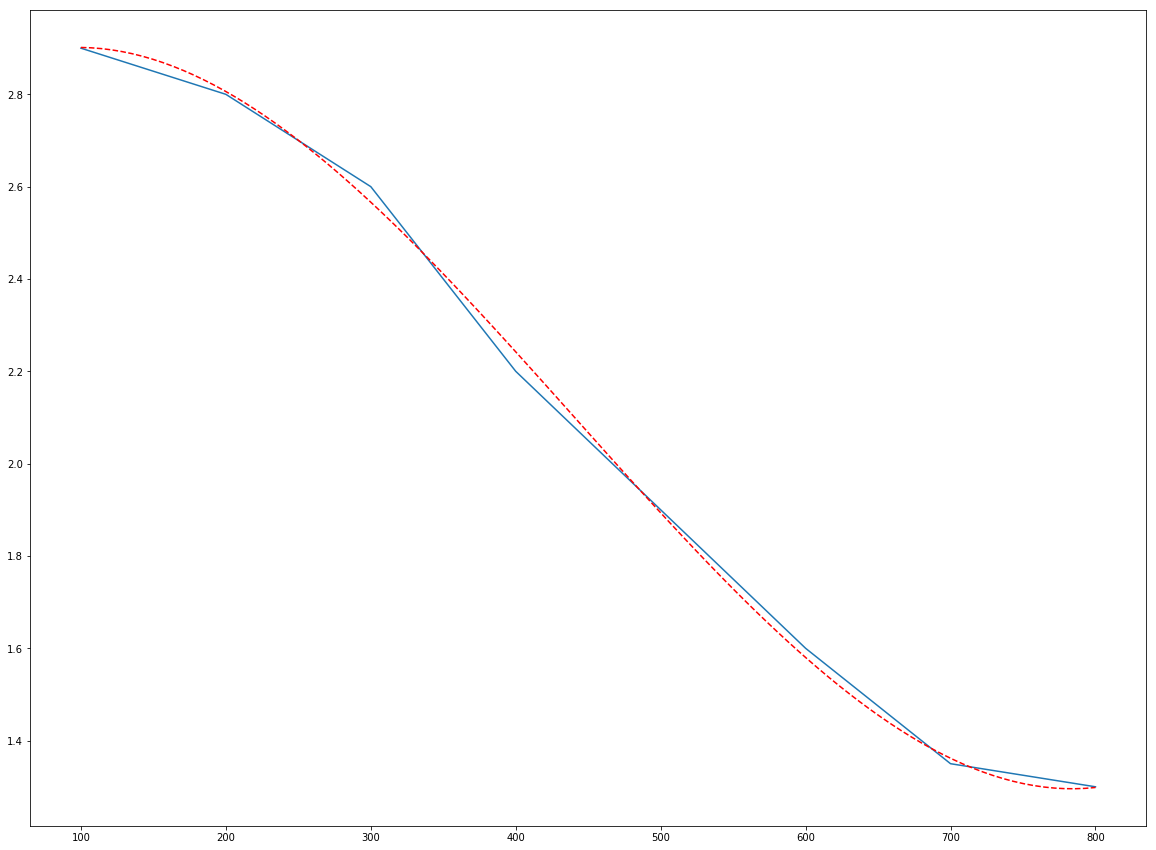

In [121]:
x = np.linspace(100, 800, 100)
plt.figure(figsize=(20, 15))

plt.plot(q, AC, '-')
plt.plot(x, res1[3] + res1[2] * x + res1[1] * x ** 2 +  res1[0] * x ** 3, 'r--')
plt.show()

In [122]:
res2

array([ 9.42234848e-09, -1.22758838e-05,  1.80350379e-03,  2.89348395e+00,
       -5.80357143e+00])

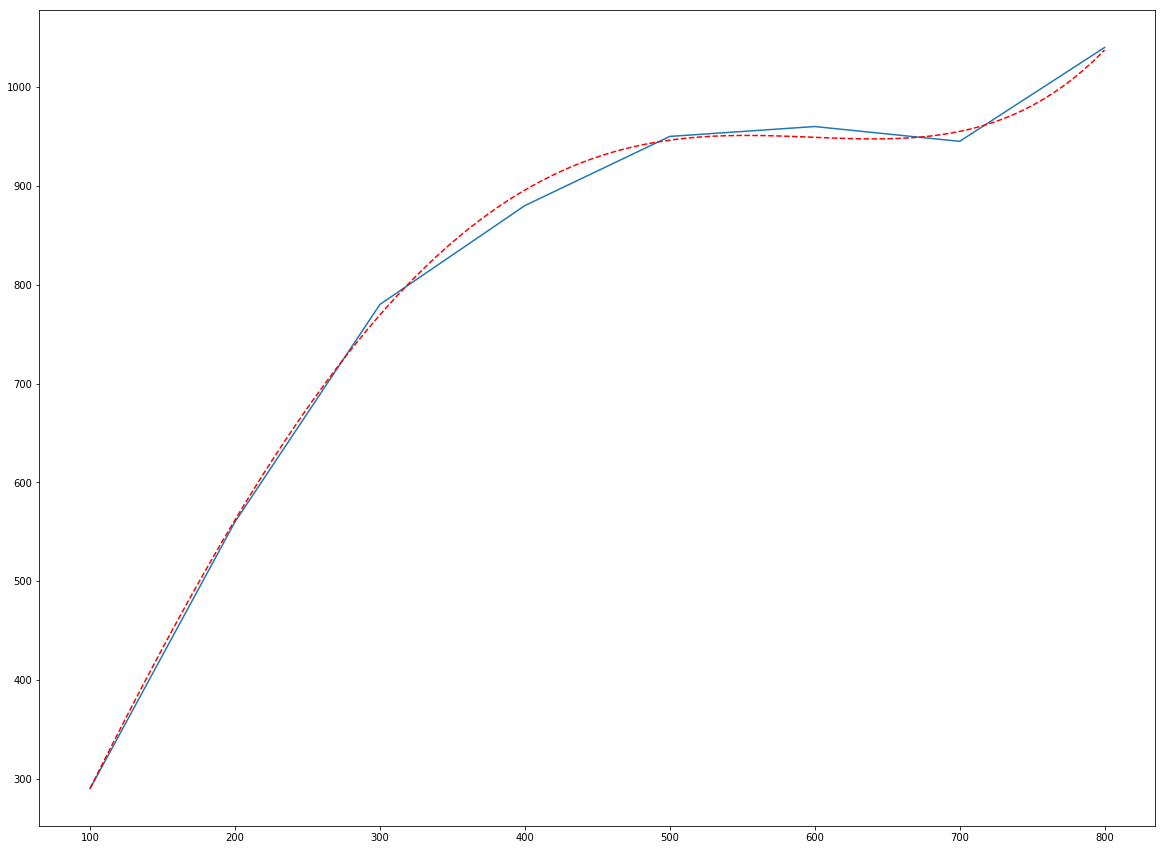

In [123]:
x = np.linspace(100, 800, 100)
plt.figure(figsize=(20, 15))

plt.plot(q, TC, '-')
plt.plot(x, res2[4] + res2[3] * x + res2[2] * x ** 2 +  res2[1] * x ** 3 + res2[0] * x ** 4, 'r--')
plt.show()

## Task6

Економісти компанії дослідили залежність між обсягами виробництва Q (в тис. шт.) та прибутком компанії Profit (в тис. у.о.), і виразили її з допомогою формули:
$Profit(Q)=-2,5×Q^4+22×Q^3-7,25×Q^2+90×Q-40.$
При яких обсягах виробництва Q прибуток компанії буде найбільшим? Зобразіть графічно функцію прибутку компанії від обсягів виробництва.

In [124]:
x = Symbol('x')
solve(-7.5 * x ** 3 + 66 * x ** 2 - 14.5 * x + 90, x)

[8.73593170822621,
 0.0320341458868966 - 1.1715847921649*I,
 0.0320341458868966 + 1.1715847921649*I]

In [125]:
def func(x):
    return -2.5 * x ** 4 + 22 * x ** 3 - 7.25 * x ** 2 + 90 * x - 40

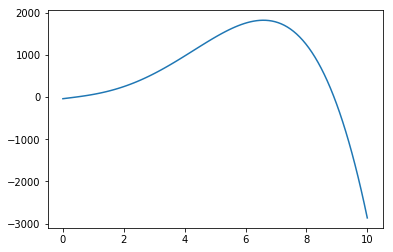

In [126]:
x = np.linspace(0, 10, 100)
plt.plot(x, func(x), '-')

In [127]:
RESULT: 8.73593170822621